In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [22]:
df = pd.read_csv('osobniki.csv', names=['bci_type','classifier','scaling','variation','mutation_prob'
                                      ,'num_of_gen','gen_size','individual','accuracy'])
# df = pd.read_csv('MCSB_wyniki.csv', names=['bci_type','classifier','scaling','variation','mutation_prob'
#                                       ,'num_of_gen','gen_size','individual','accuracy'])

In [23]:
df.head()

,bci_type,classifier,scaling,variation,mutation_prob,num_of_gen,gen_size,individual,accuracy
0,learning,knn,True,False,0.01,100,30,0000011000110111010101001110100000100000000011...,0.714286
1,learning,knn,True,False,0.01,100,30,0100000110101000100010010010000100000011101011...,0.565789
2,learning,knn,True,False,0.01,100,30,1000100000100010011001100010000101010010111110...,0.820000
3,learning,knn,True,False,0.01,100,30,1011101001000100101010110011000101100100000100...,0.731707
4,learning,knn,True,False,0.01,100,30,1001010001010010111110000011010011011101000000...,0.817073


### wszystkie dane miały ICA

In [24]:
# średnia z testów dla każdego z 3 najlepszych warunków
df.groupby(['bci_type','classifier','scaling','mutation_prob']).agg(['mean', 'count'])['accuracy']

mean  count
bci_type classifier scaling mutation_prob                 
learning knn        True    0.01           0.744010    100
         svm        True    0.01           0.752369    100
withdraw svm        True    0.01           0.781777    100

In [25]:
df.groupby(['bci_type','classifier','scaling','mutation_prob']).agg(['mean', 'min', 'max', 'std', 'count'])['accuracy']
# df.loc('learning','svm')

mean       min       max  \
bci_type classifier scaling mutation_prob                                 
learning knn        True    0.01           0.744010  0.500000  0.925926   
         svm        True    0.01           0.752369  0.456522  0.925000   
withdraw svm        True    0.01           0.781777  0.646789  0.936709   

                                                std  count  
bci_type classifier scaling mutation_prob                   
learning knn        True    0.01           0.086288    100  
         svm        True    0.01           0.089132    100  
withdraw svm        True    0.01           0.056170    100

In [26]:
df.groupby(['bci_type','classifier','scaling','mutation_prob']).agg(['max', 'count'])['accuracy']

max  count
bci_type classifier scaling mutation_prob                 
learning knn        True    0.01           0.925926    100
         svm        True    0.01           0.925000    100
withdraw svm        True    0.01           0.936709    100

In [11]:
# df.iloc[:150,8].sort_values()

In [12]:
# df.iloc[150:,8].sort_values()

In [8]:
df.groupby(['bci_type','classifier','scaling','mutation_prob']).agg(['max', 'count'])['accuracy']

,,,,max,count
bci_type,classifier,scaling,mutation_prob,,
learning,svm,True,0.01,1.00000,150
withdraw,svm,True,0.01,0.98125,150


In [19]:
df.groupby(['bci_type','classifier','scaling','mutation_prob']).std()['accuracy']

bci_type  classifier  scaling  mutation_prob
learning  svm         True     0.01             0.116812
withdraw  svm         True     0.01             0.077215
Name: accuracy, dtype: float64

### podział osobników na poszczególne cechy

In [27]:
# mam tu nazwy elektrod, ale to są dane po ICA, więc to tak na prawdę nie jest czysty sygnał z elektrod

e_names = ['FCz_','Cz_','Fz_','Pz_','C3_','C4_','F3_','F4_']
col_names = []

for i in range(1,18):
    for name in e_names:
        col_names.append(name + str(i))

In [28]:
def split_by_space(number):
    return ' '.join(list(str(number)))

In [29]:
df['split_ind'] = df['individual'].apply(split_by_space)

In [30]:
df[col_names] = df['split_ind'].str.split(" ",expand=True)

In [31]:
for column in col_names:
    df[column] = pd.to_numeric(df[column], errors='raise', downcast='integer')

In [32]:
# tabela z dodatkowymi 136 kolumnami odpowiadającycmi wszystkim cechom
df

,bci_type,classifier,scaling,variation,mutation_prob,num_of_gen,gen_size,individual,accuracy,split_ind,...,F3_16,F4_16,FCz_17,Cz_17,Fz_17,Pz_17,C3_17,C4_17,F3_17,F4_17
0,learning,knn,True,False,0.01,100,30,0000011000110111010101001110100000100000000011...,0.714286,0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 ...,...,0,0,0,1,1,0,0,0,1,1
1,learning,knn,True,False,0.01,100,30,0100000110101000100010010010000100000011101011...,0.565789,0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 ...,...,1,1,1,1,0,1,0,0,0,0
2,learning,knn,True,False,0.01,100,30,1000100000100010011001100010000101010010111110...,0.820000,1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 ...,...,1,1,0,1,0,0,1,0,0,1
3,learning,knn,True,False,0.01,100,30,1011101001000100101010110011000101100100000100...,0.731707,1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 ...,...,1,0,1,0,1,0,1,0,0,0
4,learning,knn,True,False,0.01,100,30,1001010001010010111110000011010011011101000000...,0.817073,1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 ...,...,0,0,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,learning,svm,True,False,0.01,100,30,1000000101000111100011001011100010000101000000...,0.628571,1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 ...,...,0,1,1,0,0,0,1,0,0,1
296,learning,svm,True,False,0.01,100,30,1100100111010101011010100110110010000011010100...,0.777778,1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 ...,...,0,1,0,0,1,0,0,0,1,0
297,learning,svm,True,False,0.01,100,30,0001011010000101000110100101000001001010010000...,0.750000,0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 ...,...,0,1,0,0,0,0,0,0,0,1
298,learning,svm,True,False,0.01,100,30,1110100100101010011010011010000010010000010111...,0.800000,1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 ...,...,0,1,1,0,1,0,0,1,0,0


In [33]:
# withdraw
num_of_ones = df.iloc[100:200,10:].apply(np.sum, axis=1)
print(num_of_ones.sort_values())
num_of_ones.mean()

176    43
105    49
147    49
100    50
156    50
       ..
179    60
168    60
114    60
158    60
115    62
Length: 100, dtype: int64


55.02

In [34]:
# learning
num_of_ones = df.iloc[200:,10:].apply(np.sum, axis=1)
print(num_of_ones.sort_values())
num_of_ones.mean()

230    47
250    48
294    49
244    50
260    50
       ..
233    62
274    62
256    62
227    64
248    64
Length: 100, dtype: int64


56.07

# analiza

### dla obu typów klasyfikacji (błąd vs brak błędu i pomyłka interfejsu vs poprawne działanie interfejsu)

In [35]:
# liczba wystąpień każdej cechy (w razem wziętych 300 osobnikach)

results = df[col_names].apply(np.sum, axis=0)
results.sort_values()

C3_3     102
F4_2     105
Pz_7     106
Cz_6     106
C3_15    108
        ... 
F4_15    140
Fz_8     140
C3_14    143
F4_8     144
C4_6     150
Length: 136, dtype: int64

In [36]:
# 10 "najlepszych", najczęściej wybieranych cech
results.sort_values()[-10:]

F3_17    137
Cz_13    137
C4_1     137
Pz_17    138
F3_7     139
F4_15    140
Fz_8     140
C3_14    143
F4_8     144
C4_6     150
dtype: int64

In [37]:
# zsumowałam liczbę wystąpień dowolnej cechy dla każdej składowej (bo to nie elektrody) z osobna

def sum_components(results):
    FCz_features = ['FCz_' + str(i) for i in range(1,18)]
    Cz_features = ['Cz_' + str(i) for i in range(1,18)]
    Fz_features = ['Fz_' + str(i) for i in range(1,18)]
    Pz_features = ['Pz_' + str(i) for i in range(1,18)]
    C3_features = ['C3_' + str(i) for i in range(1,18)]
    C4_features = ['C4_' + str(i) for i in range(1,18)]
    F3_features = ['F3_' + str(i) for i in range(1,18)]
    F4_features = ['F4_' + str(i) for i in range(1,18)]
    values = np.zeros(8)
    values[0] = results.loc[FCz_features].sum()
    values[1] = results.loc[Cz_features].sum()
    values[2] = results.loc[Fz_features].sum()
    values[3] = results.loc[Pz_features].sum()
    values[4] = results.loc[C3_features].sum()
    values[5] = results.loc[C4_features].sum()
    values[6] = results.loc[F3_features].sum()
    values[7] = results.loc[F4_features].sum()
    return values

values = sum_components(results)
values

array([2057., 2066., 2131., 2095., 2067., 2137., 2089., 2130.])

<BarContainer object of 8 artists>

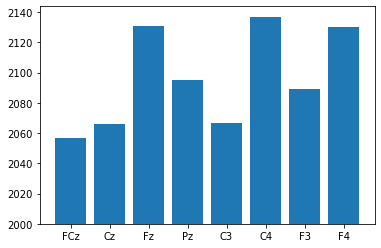

In [38]:
labels = ['FCz','Cz','Fz','Pz','C3','C4','F3','F4']
plt.bar(labels, height = values-2000, bottom = 2000)
# plt.bar(e_names, height = values-1800, bottom = 1800)

In [30]:
print(max(results))
print(min(results))

150
102


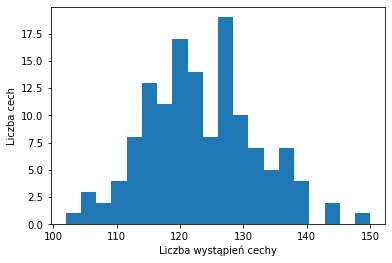

In [31]:
# na osi x są tutaj liczby odpowiadające temu ile razy dana cecha została wybrana wśród 250 osobników
# oś y pokazuje ile jest takich cech, które wystąpiły np. dokładnie 120 razy na 250 osobników

plt.hist(results, 20)
plt.xlabel('Liczba wystąpień cechy')
plt.ylabel('Liczba cech')
plt.show()

# wygląda na to, że wybór najlepszych cech może być dziełem przypadku

### analiza dla każdego warunku osobno

In [39]:
# tutaj to samo, tylko pogrupowane na 3 różne warunki

results_grouped = df.groupby(['bci_type','classifier'])[col_names].apply(np.sum, axis=0)
results_grouped

FCz_1  Cz_1  Fz_1  Pz_1  C3_1  C4_1  F3_1  F4_1  FCz_2  \
bci_type classifier                                                           
learning knn            35    36    37    53    34    40    46    44     35   
         svm            35    38    41    35    41    54    36    51     41   
withdraw svm            49    40    37    49    43    43    34    34     42   

                     Cz_2  ...  F3_16  F4_16  FCz_17  Cz_17  Fz_17  Pz_17  \
bci_type classifier        ...                                              
learning knn           42  ...     43     39      41     44     44     47   
         svm           45  ...     40     46      33     46     34     40   
withdraw svm           41  ...     36     36      36     34     43     51   

                     C3_17  C4_17  F3_17  F4_17  
bci_type classifier                              
learning knn            42     45     44     37  
         svm            44     36     46     50  
withdraw svm            46     41     47     42  

[3 rows x 136 columns]

### klasyfikator błąd intefrejsu vs poprawne działanie interfejsu
#### do klasyfikacji wykorzystany knn

In [ ]:
# wykres pokazujący jakie częstości występowania cech są najbardziej "typowe"

# tutaj dla warunku learning i knn (było 100 osobników)
plt.hist(results_grouped.loc[("learning", "knn")])
plt.xlabel('Liczba wystąpień cechy')
plt.ylabel('Liczba cech')
plt.show()

In [ ]:
values = sum_components(results_grouped.loc[("learning", "knn")])
plt.bar(e_names, height = values-650, bottom = 650)

#### ten sam klasyfikator ale svm zamiast knn

In [51]:
# 20 najlepszych cech
results_grouped.loc[("learning", "svm")].sort_values()[-20:]

Pz_2     46
Cz_3     46
F3_17    46
C4_4     46
C4_6     47
F4_10    47
Fz_4     47
C3_13    47
Fz_5     48
F4_11    48
F4_7     48
F3_9     48
C3_9     49
F3_10    49
F3_7     49
C4_2     50
F4_17    50
F4_1     51
Fz_8     53
C4_1     54
Name: (learning, svm), dtype: int64

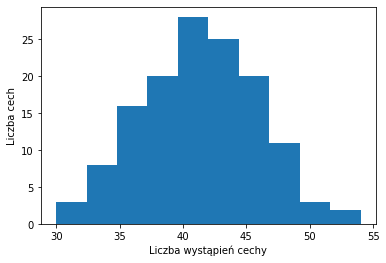

In [52]:
# tutaj dla warunku learning i svm (było 100 osobników)
plt.hist(results_grouped.loc[("learning", "svm")])
plt.xlabel('Liczba wystąpień cechy')
plt.ylabel('Liczba cech')
plt.show()

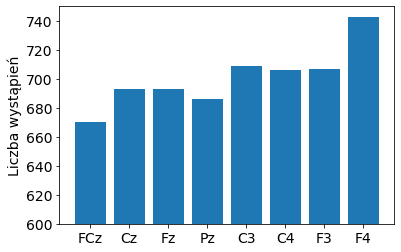

In [89]:
values = sum_components(results_grouped.loc[("learning", "svm")])
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(labels, height = values-600, bottom = 600)
plt.savefig('learning_electrodes.png', dpi=100.)
# plt.bar(e_names, height = values-1000, bottom = 1000)

### klasyfikator błąd vs brak błędu
#### do klasyfikacji użyty svm

In [40]:
# 20 najlepszych cech
results_grouped.loc[("withdraw", "svm")].sort_values()[-20:]

Pz_6      46
Cz_4      46
FCz_10    46
C3_17     46
F4_8      46
F3_17     47
F3_13     47
F3_11     47
FCz_8     48
F4_13     48
Pz_1      49
C3_14     49
C3_8      49
FCz_1     49
C4_5      50
Pz_14     51
Pz_17     51
Fz_2      51
FCz_12    53
Fz_6      54
Name: (withdraw, svm), dtype: int64

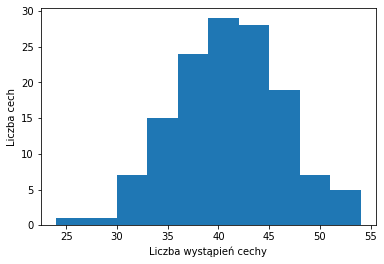

In [41]:
# tutaj dla warunku withdraw i svm (było 100 osobników))
plt.hist(results_grouped.loc[("withdraw", "svm")])
plt.xlabel('Liczba wystąpień cechy')
plt.ylabel('Liczba cech')
plt.show()

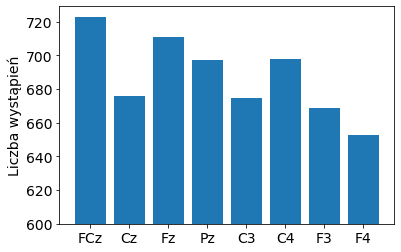

In [88]:
values = sum_components(results_grouped.loc[("withdraw", "svm")])
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(labels, height = values-600, bottom = 600)
plt.savefig('withdraw_electrodes.png', dpi=100.)
# plt.bar(e_names, height = values-900, bottom = 900)

## testy dla "najlepszych" cech

In [60]:
# funkcja zwracająca osobnika (złożonego z 0 i 1) dla najlepszych cech danych

def features_to_individual(features, n):
    best_features_series = features.sort_values()[-n:]
    best_features_list = list(best_features_series.index.values)
    individual = np.zeros(136)
    i = 0
    for feature in col_names:
        if feature in best_features_list:
            individual[i] = 1
        i += 1
    return individual

#### funkcje do przygotowania danych do testu

In [71]:
# funkcja łądująca dane wszytskich osób badanych

def load_all_data():
    people = []
    for i in range(15):
#     for i in range(1,16):
    # omijam osobę 5
        if i != 4:
#         if i != 5:
            person = np.genfromtxt('ICA/Features_os' + str(i) + '.csv', delimiter=',')
#             person = np.genfromtxt('MCSB_dane/Features_os' + str(i) + '.csv', delimiter=',')
            # delete first row with electrode/signal names
            person = np.delete(person, 0, 0)
            people.append(person)
    data = np.concatenate((people[0:14]))
#     np.random.shuffle(data)
    return data

In [62]:
# funkcja łądująca dane jednej osoby badanej

def load_person_data(person_num):
    person_data = np.genfromtxt('ICA/Features_os' + str(person_num) + '.csv', delimiter=',')
    # delete first row with electrode/signal names
    person_data = np.delete(person_data, 0, 0)
    return person_data

In [63]:
# funkcje pomocnicze zmieniające wartość w ostatniej kolumnie arraya

def change_4_to_0(arr):
    if arr[-1] == 4:
        arr[-1] = 0
        
def change_5_to_1(arr):
    if arr[-1] == 5:
        arr[-1] = 1
        
def change_5_to_0(arr):
    if arr[-1] == 5:
        arr[-1] = 0

In [64]:
# funkcja zmieniająca wartość w ostatniej kolumnie w zależności od tego czy klasyfikator ma odróżniać:
# - błędy interfejsu od udanych kliknięć i błędów użytkownika (do bci uczącego się)
# - błędy interfejsu i błędy użytkownika od udanych kliknięć (do bci cofającego błędy)

def recode_data(data, bci_type):
    if bci_type == 'learning':
#         błędy użytkownika (5) traktowane jak sukcesy
        np.apply_along_axis(change_4_to_0, 1, data)
        np.apply_along_axis(change_5_to_1, 1, data)
    elif bci_type == 'withdraw':
#         błędy użytkownika (5) traktowane jak porażki
        np.apply_along_axis(change_4_to_0, 1, data)
        np.apply_along_axis(change_5_to_0, 1, data)
    else:
        print('wrong type')
    
# recode_data(rest, 'withdraw')

In [65]:
# funkcja standaryzująca każdą z cech tak, aby miała średnią = 0 i wariancję = 1

def scale_data(data):
    scaler = preprocessing.StandardScaler().fit(data[:,:-1])
    scaled_data = scaler.transform(data[:,:-1])
    data = np.hstack((scaled_data, np.expand_dims(data[:,-1], axis=1)))
    return data
    
# rest, test = scale_data(rest, test)

In [66]:
# wyrównywanie liczby wierszy dla każdej z klas
# zwraca dane uporządkowane klasami, ale to nie problem, bo potem i tak są one mieszane przed treningiem i testem

def downsample(data):
    # Indicies of each class' observations
    i_class0 = np.where(data[:,-1] == 0)[0]
    i_class1 = np.where(data[:,-1] == 1)[0]

    # Number of observations in each class
    n_class0 = len(i_class0)
    n_class1 = len(i_class1)

    # For every observation of class 0, randomly sample from class 1 without replacement
    i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

    # Join together class 0's target vector with the downsampled class 1's target vector
    joined = np.vstack((data[i_class0], data[i_class1_downsampled]))
    return joined

#### funkcja przeprowadzająca test

In [67]:
def perform_end_test(X_end_test, y_end_test, alltime_best_individual, classifier, rand_state):
    folds = KFold(n_splits=X_end_test.shape[0]//5, shuffle=True)
    if classifier == 'knn':
        neigh3 = KNeighborsClassifier(n_neighbors=3)
        score = cross_val_score(neigh3, X_end_test[:,alltime_best_individual==1], y_end_test, cv=folds)
    elif classifier == 'svm':
        clf2 = svm.SVC()
        score = cross_val_score(clf2, X_end_test[:,alltime_best_individual==1], y_end_test, cv=folds)
    else:
        print('wrong classifier')
#     print('end test score: ',score)
    print('\nend test score mean: ',score.mean(), '\n')
    return score.mean()

# testy

In [68]:
features_max_num = 55

In [69]:
individuals_learning = np.empty([features_max_num,136])
individuals_withdraw = np.empty([features_max_num,136])
for i in range(features_max_num):
    individuals_learning[i] = features_to_individual(results_grouped.loc[("learning", "svm")], i+1)
    individuals_withdraw[i] = features_to_individual(results_grouped.loc[("withdraw", "svm")], i+1)

In [72]:
all_data = load_all_data()
recode_data(all_data, 'learning')
all_data = scale_data(all_data)
all_data = downsample(all_data)

In [73]:
scores_learning = np.empty([features_max_num])
for j in range(features_max_num):
    print('j:', j)
    scores_learning[j] = perform_end_test(all_data[:,:-1], all_data[:,-1], individuals_learning[j], classifier='svm', rand_state=4)

j: 0

end test score mean:  0.6085034013605443 

j: 1

end test score mean:  0.6374149659863945 

j: 2

end test score mean:  0.6547619047619047 

j: 3

end test score mean:  0.6534013605442177 

j: 4

end test score mean:  0.6435374149659864 

j: 5

end test score mean:  0.64421768707483 

j: 6

end test score mean:  0.64421768707483 

j: 7

end test score mean:  0.6397959183673468 

j: 8

end test score mean:  0.648299319727891 

j: 9

end test score mean:  0.6527210884353741 

j: 10

end test score mean:  0.6653061224489796 

j: 11

end test score mean:  0.6636054421768707 

j: 12

end test score mean:  0.6530612244897959 

j: 13

end test score mean:  0.6789115646258503 

j: 14

end test score mean:  0.6755102040816325 

j: 15

end test score mean:  0.6748299319727891 

j: 16

end test score mean:  0.6846938775510204 

j: 17

end test score mean:  0.693877551020408 

j: 18

end test score mean:  0.7006802721088434 

j: 19

end test score mean:  0.683673469387755 

j: 20

end test s

In [74]:
all_data = load_all_data()
recode_data(all_data, 'withdraw')
all_data = scale_data(all_data)
all_data = downsample(all_data)

In [75]:
scores_withdraw = np.empty([features_max_num])
for j in range(features_max_num):
    print('j:', j)
    scores_withdraw[j] = perform_end_test(all_data[:,:-1], all_data[:,-1], individuals_withdraw[j], classifier='svm', rand_state=4)

j: 0

end test score mean:  0.5430232558139535 

j: 1

end test score mean:  0.6174418604651163 

j: 2

end test score mean:  0.6387596899224807 

j: 3

end test score mean:  0.6430232558139535 

j: 4

end test score mean:  0.6702842377260982 

j: 5

end test score mean:  0.6722222222222223 

j: 6

end test score mean:  0.6984496124031008 

j: 7

end test score mean:  0.7056847545219638 

j: 8

end test score mean:  0.7177002583979328 

j: 9

end test score mean:  0.7210594315245478 

j: 10

end test score mean:  0.7295865633074935 

j: 11

end test score mean:  0.7268733850129199 

j: 12

end test score mean:  0.7317829457364341 

j: 13

end test score mean:  0.7317829457364341 

j: 14

end test score mean:  0.7282945736434108 

j: 15

end test score mean:  0.7344961240310077 

j: 16

end test score mean:  0.7334625322997417 

j: 17

end test score mean:  0.734625322997416 

j: 18

end test score mean:  0.7348837209302327 

j: 19

end test score mean:  0.7541343669250646 

j: 20

end 

In [76]:
print(scores_learning)
print(scores_withdraw)

[0.6085034  0.63741497 0.6547619  0.65340136 0.64353741 0.64421769
 0.64421769 0.63979592 0.64829932 0.65272109 0.66530612 0.66360544
 0.65306122 0.67891156 0.6755102  0.67482993 0.68469388 0.69387755
 0.70068027 0.68367347 0.70782313 0.72482993 0.70510204 0.70952381
 0.71666667 0.71122449 0.72789116 0.72653061 0.72176871 0.72278912
 0.72789116 0.72346939 0.73265306 0.73197279 0.73605442 0.7292517
 0.73605442 0.73435374 0.71870748 0.71564626 0.72959184 0.73129252
 0.73333333 0.72993197 0.73163265 0.73231293 0.7414966  0.74013605
 0.74013605 0.74829932 0.74387755 0.75       0.7622449  0.74591837
 0.74557823]
[0.54302326 0.61744186 0.63875969 0.64302326 0.67028424 0.67222222
 0.69844961 0.70568475 0.71770026 0.72105943 0.72958656 0.72687339
 0.73178295 0.73178295 0.72829457 0.73449612 0.73346253 0.73462532
 0.73488372 0.75413437 0.75374677 0.73966408 0.7374677  0.74444444
 0.74186047 0.75193798 0.75555556 0.75865633 0.74702842 0.76085271
 0.7622739  0.75852713 0.76175711 0.75839793 0.757

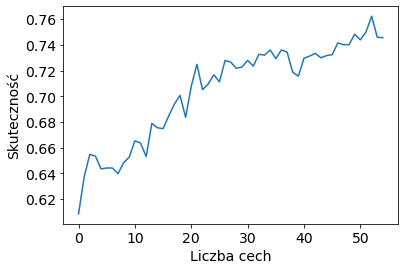

In [82]:
plt.xlabel('Liczba cech', fontsize=14)
plt.ylabel('Skuteczność', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(scores_learning)
plt.savefig('learning_features.png', dpi=120., bbox_inches="tight")

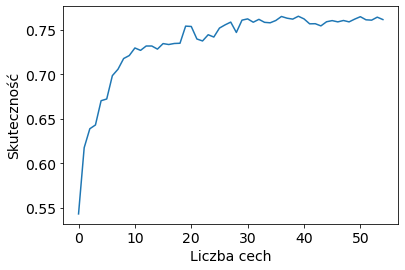

In [83]:
plt.xlabel('Liczba cech', fontsize=14)
plt.ylabel('Skuteczność', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(scores_withdraw)
plt.savefig('withdraw_features.png', dpi=120., bbox_inches="tight")

### jeszcze raz to samo ale z funkcją testu robiącą test na każdym wierszu z osobna

In [66]:
def perform_end_test(X_end_test, y_end_test, alltime_best_individual, classifier, rand_state):
    folds = KFold(n_splits=X_end_test.shape[0], shuffle=True)
    if classifier == 'knn':
        neigh3 = KNeighborsClassifier(n_neighbors=3)
        score = cross_val_score(neigh3, X_end_test[:,alltime_best_individual==1], y_end_test, cv=folds)
    elif classifier == 'svm':
        clf2 = svm.SVC()
        score = cross_val_score(clf2, X_end_test[:,alltime_best_individual==1], y_end_test, cv=folds)
    else:
        print('wrong classifier')
#     print('end test score: ',score)
    print('\nend test score mean: ',score.mean(), '\n')
    return score.mean()

In [84]:
features_max_num = 70

individuals_learning = np.empty([features_max_num,136])
individuals_withdraw = np.empty([features_max_num,136])
for i in range(features_max_num):
    individuals_learning[i] = features_to_individual(results_grouped.loc[("learning", "svm")], i+1)
    individuals_withdraw[i] = features_to_individual(results_grouped.loc[("withdraw", "svm")], i+1)
    
#learning    
all_data = load_all_data()
recode_data(all_data, 'learning')
all_data = scale_data(all_data)
all_data = downsample(all_data)
scores_learning = np.empty([features_max_num])
for j in range(features_max_num):
    print('j:', j)
    scores_learning[j] = perform_end_test(all_data[:,:-1], all_data[:,-1], individuals_learning[j], classifier='svm', rand_state=4)
    
# withdraw
all_data = load_all_data()
recode_data(all_data, 'withdraw')
all_data = scale_data(all_data)
all_data = downsample(all_data)
scores_withdraw = np.empty([features_max_num])
for j in range(features_max_num):
    print('j:', j)
    scores_withdraw[j] = perform_end_test(all_data[:,:-1], all_data[:,-1], individuals_withdraw[j], classifier='svm', rand_state=4)    

j: 0

end test score mean:  0.572108843537415 

j: 1

end test score mean:  0.6071428571428571 

j: 2

end test score mean:  0.6275510204081632 

j: 3

end test score mean:  0.6360544217687074 

j: 4

end test score mean:  0.627891156462585 

j: 5

end test score mean:  0.6486394557823129 

j: 6

end test score mean:  0.6268707482993197 

j: 7

end test score mean:  0.638095238095238 

j: 8

end test score mean:  0.638095238095238 

j: 9

end test score mean:  0.6360544217687076 

j: 10

end test score mean:  0.6323129251700681 

j: 11

end test score mean:  0.6445578231292517 

j: 12

end test score mean:  0.6534013605442177 

j: 13

end test score mean:  0.6656462585034012 

j: 14

end test score mean:  0.6982993197278912 

j: 15

end test score mean:  0.692857142857143 

j: 16

end test score mean:  0.7044217687074829 

j: 17

end test score mean:  0.6969387755102039 

j: 18

end test score mean:  0.7129251700680271 

j: 19

end test score mean:  0.712925170068027 

j: 20

end test 

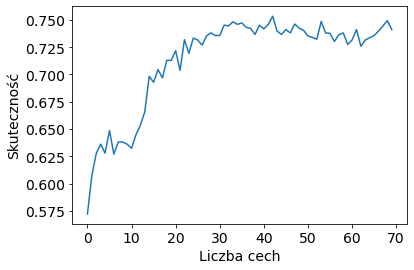

In [85]:
plt.xlabel('Liczba cech', fontsize=14)
plt.ylabel('Skuteczność', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(scores_learning)
plt.savefig('learning_features2.png', dpi=120., bbox_inches="tight")

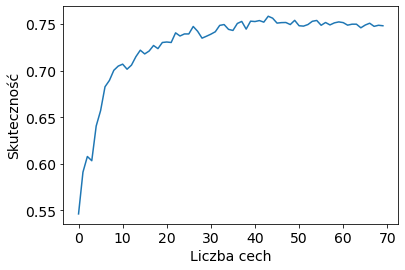

In [86]:
plt.xlabel('Liczba cech', fontsize=14)
plt.ylabel('Skuteczność', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(scores_withdraw)
plt.savefig('withdraw_features2.png', dpi=120., bbox_inches="tight")

In [87]:
print(scores_learning)
print(scores_withdraw)

[0.57210884 0.60714286 0.62755102 0.63605442 0.62789116 0.64863946
 0.62687075 0.63809524 0.63809524 0.63605442 0.63231293 0.64455782
 0.65340136 0.66564626 0.69829932 0.69285714 0.70442177 0.69693878
 0.71292517 0.71292517 0.72176871 0.7037415  0.73197279 0.71938776
 0.73333333 0.73163265 0.72687075 0.73537415 0.73809524 0.73571429
 0.73571429 0.7452381  0.74455782 0.74829932 0.74591837 0.74727891
 0.74319728 0.74217687 0.73673469 0.7452381  0.74183673 0.74591837
 0.75340136 0.73979592 0.73673469 0.74115646 0.73809524 0.7462585
 0.74251701 0.74047619 0.73537415 0.73401361 0.73231293 0.74863946
 0.73809524 0.7377551  0.73027211 0.73639456 0.73809524 0.72755102
 0.73163265 0.74115646 0.72585034 0.73163265 0.73367347 0.73571429
 0.73979592 0.74455782 0.74931973 0.74115646]
[0.54625323 0.59108527 0.60788114 0.60335917 0.64056848 0.65710594
 0.68268734 0.68953488 0.7003876  0.70490956 0.70697674 0.70155039
 0.70594315 0.71498708 0.72196382 0.71795866 0.72105943 0.72700258
 0.72364341 0.730

### to już raczej niepotrzebne

In [ ]:
# najlepsze osobniki dla 10 cech

individual_learning_10 = features_to_individual(results_grouped.loc[("learning", "svm")], 10)
individual_withdraw_10 = features_to_individual(results_grouped.loc[("withdraw", "svm")], 10)

# najlepsze osobniki dla 20 cech

individual_learning_20 = features_to_individual(results_grouped.loc[("learning", "svm")], 20)
individual_withdraw_20 = features_to_individual(results_grouped.loc[("withdraw", "svm")], 20)

# najlepsze osobniki dla 30 cech

individual_learning_30 = features_to_individual(results_grouped.loc[("learning", "svm")], 30)
individual_withdraw_30 = features_to_individual(results_grouped.loc[("withdraw", "svm")], 30)

#### testy dla klasyfikatora błąd vs brak błędu

In [ ]:
all_data = load_all_data()
recode_data(all_data, 'withdraw')
all_data = scale_data(all_data)
all_data = downsample(all_data)

In [ ]:
for i in range()

In [ ]:
score_10 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_withdraw_10, classifier='svm', rand_state=4)

In [ ]:
score_20 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_withdraw_20, classifier='svm', rand_state=4)

In [ ]:
score_30 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_withdraw_30, classifier='svm', rand_state=4)

#### testy dla klasyfikatora błąd interfejsu vs poprawne działanie interfejsu

In [ ]:
all_data = load_all_data()
recode_data(all_data, 'learning')
all_data = scale_data(all_data)
all_data = downsample(all_data)

In [ ]:
score_10 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_learning_10, classifier='svm', rand_state=4)

In [ ]:
score_20 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_learning_20, classifier='svm', rand_state=4)

In [ ]:
score_30 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_learning_30, classifier='svm', rand_state=4)

In [ ]:
individual_withdraw_10

In [ ]:
individual_withdraw_20

In [ ]:
individual_learning_40 = features_to_individual(results_grouped.loc[("learning", "svm")], 40)
score_40 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_learning_40, classifier='svm', rand_state=4)

In [ ]:
individual_learning_50 = features_to_individual(results_grouped.loc[("learning", "svm")], 50)
score_50 = perform_end_test(all_data[:,:-1], all_data[:,-1], individual_learning_50, classifier='svm', rand_state=4)